# FAKE NEWS DETECTION -

#### What is Fake News? 

   + A type of **yellow journalism**, fake news encapsulates pieces of news which may be hoaxes and generally spread through social media and other online media. This is often done to further or impose certain ideas and often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.
   
#### Objective
   
   + To build a model to accurately classify a piece of news as REAL or FAKE.
   
   


### 1. Loading Libraries

In [2]:
import pandas as pd # for data manipulation
import numpy as np # for linear algebra & calculation

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly as ply

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


### 2. Loading Data

In [8]:
fake_news = pd.read_csv("news.csv")
print(f"The Fake news dataset consist {fake_news.shape[0]} rows and {fake_news.shape[1]} columns respectively. \n")
fake_news.head()

The Fake news dataset consist 6335 rows and 4 columns respectively. 



,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [9]:
# get the labels from dataset

labels = fake_news['label']
labels.unique()

array(['FAKE', 'REAL'], dtype=object)

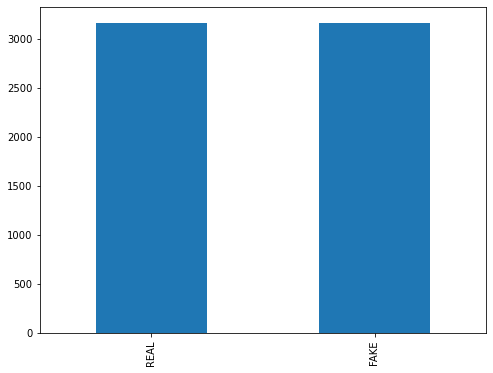

In [11]:
labels.value_counts().plot.bar(figsize = (8,6))

In [26]:
fake_news.text.head(15)

0     Daniel Greenfield, a Shillman Journalism Fello...
1     Google Pinterest Digg Linkedin Reddit Stumbleu...
2     U.S. Secretary of State John F. Kerry said Mon...
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...
4     It's primary day in New York and front-runners...
5       \nI’m not an immigrant, but my grandparents ...
6     Share This Baylee Luciani (left), Screenshot o...
7     A Czech stockbroker who saved more than 650 Je...
8     Hillary Clinton and Donald Trump made some ina...
9     Iranian negotiators reportedly have made a las...
10    CEDAR RAPIDS, Iowa — “I had one of the most wo...
11    Donald Trump’s organizational problems have go...
12    Click Here To Learn More About Alexandra's Per...
13    October 31, 2016 at 4:52 am \nPretty factual e...
14    Killing Obama administration rules, dismantlin...
Name: text, dtype: object

#### Splitting Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(fake_news['text'], labels, test_size = 0.20, random_state = 7)

print(f"X_train & X_test sets shape : {X_train.shape} & {X_test.shape}")
print(f"y_train & y_test sets shape respectively : {y_train.shape} & {y_test.shape}")

X_train & X_test sets shape : (5068,) & (1267,)
y_train & y_test sets shape respectively : (5068,) & (1267,)


In [21]:
# Initialize TF-IDF Vectorize
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Fit and transform train set and test set respectively
train_tfidf = tfidf_vectorizer.fit_transform(X_train)
test_tfidf = tfidf_vectorizer.transform(X_test)

# Checking transformation done or not
print("X_Train Transform : ")
print("*"*40)
print(train_tfidf)

X_Train Transform : 
****************************************
  (0, 56381)	0.03622223988286098
  (0, 16314)	0.053492157980948106
  (0, 19620)	0.030351855107005405
  (0, 52607)	0.04266045446208797
  (0, 14900)	0.039165339742818085
  (0, 53749)	0.029756205182552464
  (0, 15211)	0.07772572986248194
  (0, 61154)	0.06726619958695557
  (0, 59042)	0.047893261248723944
  (0, 42972)	0.03152542343098286
  (0, 54232)	0.038673616329284524
  (0, 59249)	0.04106143649018827
  (0, 28891)	0.06514397995138038
  (0, 41708)	0.03983513460128018
  (0, 50192)	0.045331181477256094
  (0, 44691)	0.0318676439567658
  (0, 11820)	0.046381950858248124
  (0, 7682)	0.04137048243377956
  (0, 50343)	0.10196965191544219
  (0, 48095)	0.021092647294770877
  (0, 17916)	0.03674587236023286
  (0, 46027)	0.10236534701241509
  (0, 16993)	0.02775494464904786
  (0, 55006)	0.03368300200002207
  (0, 51389)	0.03397042876291898
  :	:
  (5067, 32909)	0.09429823872256275
  (5067, 59221)	0.11305513144362901
  (5067, 14649)	0.0377297184

In [34]:
# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50, random_state = 48)
pac.fit(train_tfidf, y_train)

# Predict on the test set and calculate accuracy
y_pred = pac.predict(test_tfidf)
score = accuracy_score(y_test, y_pred)
print(f">>> Accuracy on Test Set : {round(score * 100, 2)}")

# Predict on train set & calculate accuracy
y_hat = pac.predict(train_tfidf)
score_1 = accuracy_score(y_train, y_hat)
print(f">>> Accuracy on Train Set : {round(score_1 * 100, 2)}")

>>> Accuracy on Test Set : 92.9
>>> Accuracy on Train Set : 100.0


In [35]:
# Built a confusion matrix
confusion_matrix(y_test, y_pred, labels = ['FAKE','REAL'])

array([[590,  48],
       [ 42, 587]], dtype=int64)

In [36]:
confusion_matrix(y_train, y_hat, labels = ['FAKE','REAL'])

array([[2526,    0],
       [   0, 2542]], dtype=int64)